In [106]:
import matplotlib as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [107]:
df = pd.read_csv("dataset/NetflixViewingHistory.csv")

In [108]:
df.describe()

,Title,Date
count,6058,6058
unique,6052,1242
top,Héroes,18-08-18
freq,2,34


In [109]:
df.head()

,Title,Date
0,Like Stars on Earth,22-06-20
1,The Sinner: Jamie: Parte II,21-06-20
2,The Blacklist: Temporada 4: El Harén (N.° 102),21-06-20
3,The Blacklist: Temporada 4: El Pronosticador (...,21-06-20
4,The Blacklist: Temporada 4: Mariscos Lipet (N....,20-06-20


In [110]:
df['Date'] = pd.to_datetime(df['Date'])

In [111]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Period'] = df['Date'].dt.to_period("M")
df['Dayofweek'] = df['Date'].dt.weekday

In [112]:
df.head()

,Title,Date,Year,Month,Day,Period,Dayofweek
0,Like Stars on Earth,2020-06-22,2020,6,22,2020-06,0
1,The Sinner: Jamie: Parte II,2020-06-21,2020,6,21,2020-06,6
2,The Blacklist: Temporada 4: El Harén (N.° 102),2020-06-21,2020,6,21,2020-06,6
3,The Blacklist: Temporada 4: El Pronosticador (...,2020-06-21,2020,6,21,2020-06,6
4,The Blacklist: Temporada 4: Mariscos Lipet (N....,2020-06-20,2020,6,20,2020-06,5


In [113]:
titles = df.groupby("Period")["Title"].count()
titles.tail()

Period
2020-08    33
2020-09    32
2020-10    12
2020-11    15
2020-12    22
Freq: M, Name: Title, dtype: int64

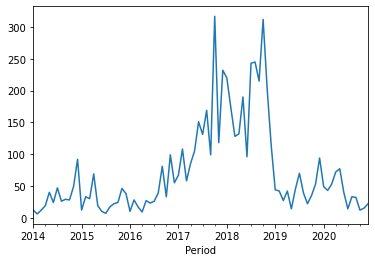

In [114]:
ax = titles.plot.line()

In [115]:
titles_dayWeek = df.groupby("Dayofweek")["Title"].count()
titles_dayWeek

Dayofweek
0    813
1    928
2    845
3    715
4    818
5    956
6    983
Name: Title, dtype: int64

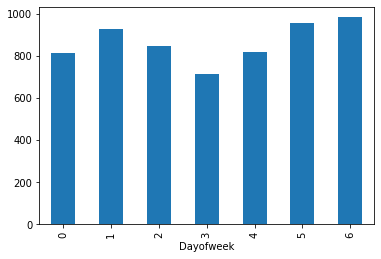

In [116]:
ax = titles_dayWeek.plot.bar()

In [117]:
df['TitleFirst'] = df['Title'].str.split(':').str[0]

df.head()

,Title,Date,Year,Month,Day,Period,Dayofweek,TitleFirst
0,Like Stars on Earth,2020-06-22,2020,6,22,2020-06,0,Like Stars on Earth
1,The Sinner: Jamie: Parte II,2020-06-21,2020,6,21,2020-06,6,The Sinner
2,The Blacklist: Temporada 4: El Harén (N.° 102),2020-06-21,2020,6,21,2020-06,6,The Blacklist
3,The Blacklist: Temporada 4: El Pronosticador (...,2020-06-21,2020,6,21,2020-06,6,The Blacklist
4,The Blacklist: Temporada 4: Mariscos Lipet (N....,2020-06-20,2020,6,20,2020-06,5,The Blacklist


In [123]:
titlesFirst = df.groupby("TitleFirst")["TitleFirst"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
titlesFirst.head(10)

,TitleFirst,count
687,Heartland,194
301,Cómo conocí a tu madre,187
498,El príncipe del rap,145
104,Anatomía según Grey,145
971,Lindas mentirosas,145
1131,Modern Family,144
121,Arrow,115
598,Flash,83
911,La reina del flow,82
1501,The Blacklist,78


Text(0, 0.5, 'Propina promedio')

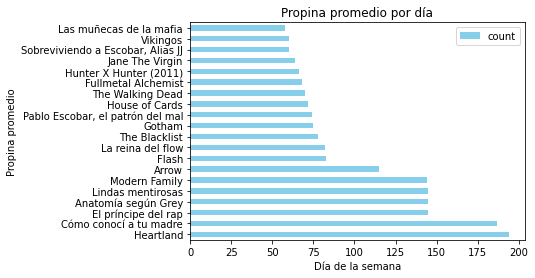

In [129]:
ax = titlesFirst.plot.barh(x='TitleFirst', y='count', color = 'skyblue', title = 'Propina promedio por día')
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Propina promedio")